<a href="https://colab.research.google.com/github/abayro125/MAT494/blob/main/1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

Linear regression is frequently used:


*   due to its simplicity
*   depend on linearly unknown parameters which are easier to fit

1.3.1 QR Decomposition
A useful procedure to solve linear least squares problem. Firstly, the Gram-Schmidt algorithm is used to obtain an orthonormal basis spance from an linearly independent span. To derive the QR decomposition, let 


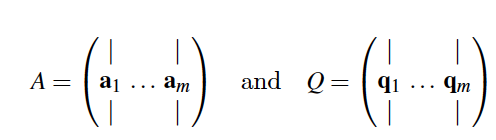

where A and Q are n x m matrices. The output of the Gram-Schimdt algorithm can be written as: 

A = QR


where matrix R contains the coefficient of the linear combinations of qj's that produce ai.

The columns of i of R have only zeros in the diagonal (upper triangular) 

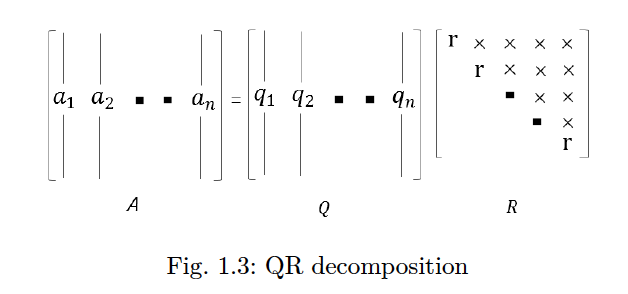

In [1]:
import numpy as np
from scipy.linalg import qr #imports linear algebra functions


def QR_Decomposition(A):
    n, m = A.shape # get the shape of A

    Q = np.empty((n, n)) # initialize matrix Q
    u = np.empty((n, n)) # initialize matrix u

    u[:, 0] = A[:, 0]
    Q[:, 0] = u[:, 0] / np.linalg.norm(u[:, 0]) #normalization

    for i in range(1, n):

        u[:, i] = A[:, i]
        for j in range(i):
            u[:, i] -= (A[:, i] @ Q[:, j]) * Q[:, j] # get each u vector

        Q[:, i] = u[:, i] / np.linalg.norm(u[:, i]) # compute each e vetor

    R = np.zeros((n, m))
    for i in range(n):
        for j in range(i, m):
            R[i, j] = A[:, j] @ Q[:, i]

    return Q, R


def diag_sign(A):
    print("Compute the signs of the diagonal of matrix A")

    D = np.diag(np.sign(np.diag(A)))

    return D

def adjust_sign(Q, R):
    print("Adjust the signs of the columns in Q and rows in R to impose positive diagonal of Q")

    D = diag_sign(Q)

    Q[:, :] = Q @ D
    R[:, :] = D @ R

    return Q, R


A = np.array([[1.0, 0.5, 0.2], [0.5, 0.5, 1.0], [0.0, 1.0, 1.0]])

Q, R = adjust_sign(*QR_Decomposition(A))


print("The matrix A is:", A)
print("The matrix Q is:", Q)
print("The matrix R is:", R)



Adjust the signs of the columns in Q and rows in R to impose positive diagonal of Q
Compute the signs of the diagonal of matrix A
The matrix A is: [[1.  0.5 0.2]
 [0.5 0.5 1. ]
 [0.  1.  1. ]]
The matrix Q is: [[ 0.89442719 -0.09759001  0.43643578]
 [ 0.4472136   0.19518001 -0.87287156]
 [ 0.          0.97590007  0.21821789]]
The matrix R is: [[ 1.11803399  0.67082039  0.62609903]
 [ 0.          1.02469508  1.15156209]
 [ 0.          0.         -0.56736651]]


1.3.2 Least-Sqaures Problems

Useful for when we are interested in solving for an over-determine case where n > m. 

Theorem 1.3.1 (Normal Equations) Let A ∈ Rn×m be an n×m matrix with
linearly independent columns and let b ∈ Rn be a vector. The solution to the least-squares problem

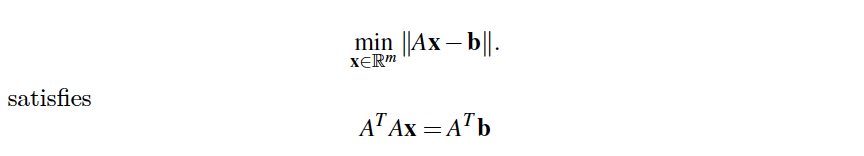

We solve the problem via QR decomposition: 

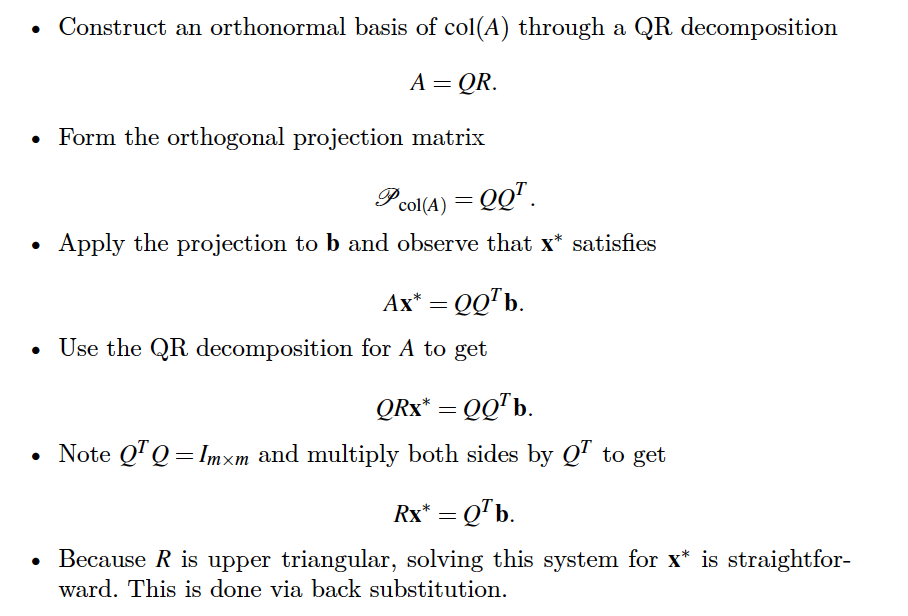


Theorem 1.3.2 (Least Squares via QR) Let A ∈Rn×m be an n×m matrix with
linearly independent columns, let b ∈ Rn be a vector, and let A = QR be a
QR decomposition of A, where Q is a Rn×m matrix with QTQ = Im×m and R
is upper triangular. The solution to the least-squares problem
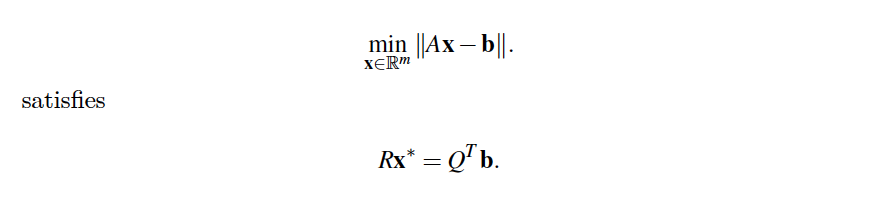

In [2]:
import math

Q = np.array([[1/math.sqrt(3), 1/math.sqrt(2)], [1/math.sqrt(3), -1/math.sqrt(2)], [1/math.sqrt(3), 0]]) #Q matrix
R = np.array([[math.sqrt(3), 2*math.sqrt(3)], [0, 3*math.sqrt(2)]]) #R matrix
b = np.array([[-3],[3], [0]]) #b vector


temp = np.dot(np.linalg.inv(R),np.transpose(Q))
x = np.dot(temp, b)
print('The x vector is:', x)



The x vector is: [[ 2.]
 [-1.]]


1.3.3 Linear Regression

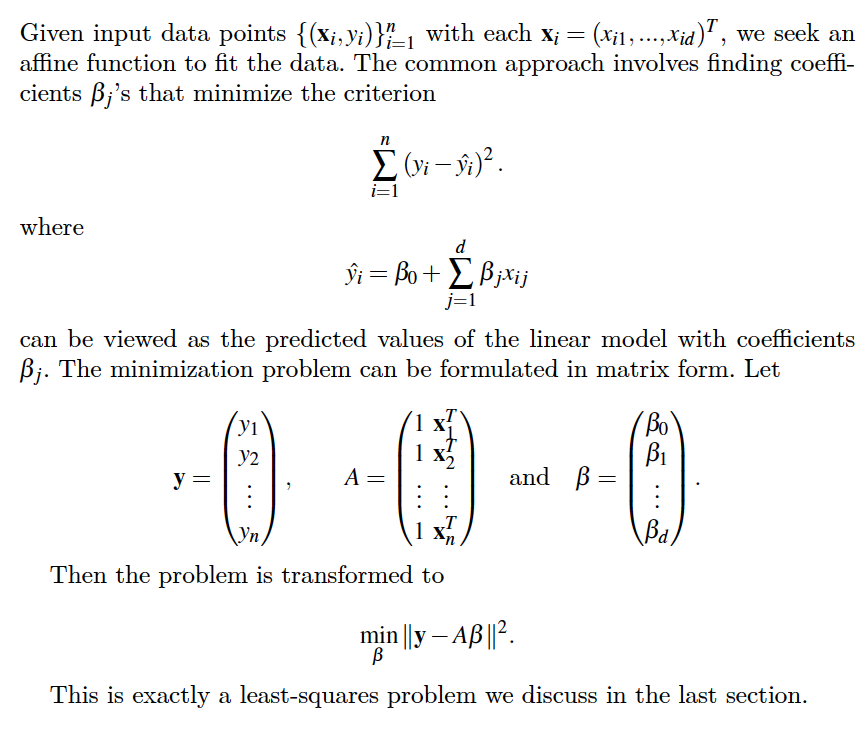

The parameters of the model: Intercept    5.075153
x            2.019116
dtype: float64


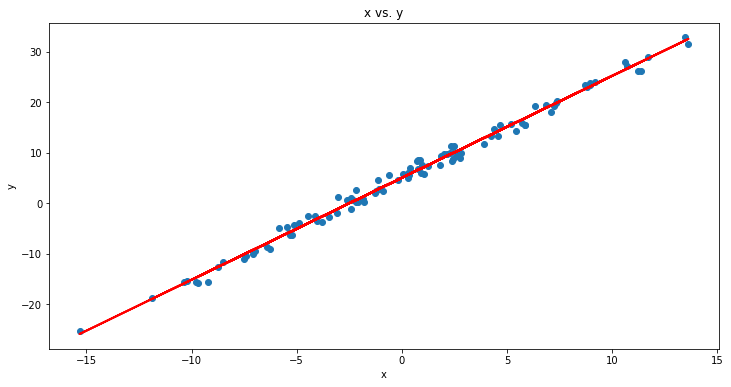

In [3]:
import pandas as pd
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt



np.random.seed(0) #Create data
x = 6 * np.random.randn(100)    
residual = np.random.randn(100)       
y = 5 + 2 * x + residual 

df = pd.DataFrame(
    {'x': x,
     'y': y}
)

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('y ~ x', data = df)
model = model.fit()

print("The parameters of the model:", model.params)



# Predict values
pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'o')           # scatter plot showing actual data
plt.plot(x, pred, 'r', linewidth=2)   # regression line
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs. y')

plt.show()